# Web Scrapping

In [ ]:
# !pip install beautifulsoup4

In [ ]:
# url = 'https://www.worldometers.info/coronavirus/#countries'
# Extract/collate the data
# Cleaning
# EDA
# Conclusion
# Model building - BoW, TF-IDF, Word2Vec, Bert, NaiveBayes

In [1]:
import os
from datetime import date, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup

import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import gc

In [2]:
url = 'https://www.worldometers.info/coronavirus/#countries'
req = Request(url, headers = {'User-Agent':'Mozilla/5.0'})
webpage = urlopen(req)
print(webpage)


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon
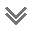

In [3]:
page_soup = soup(webpage, 'html.parser')
page_soup

In [4]:
today = datetime.now()
print(today)

2023-12-01 05:46:05.878570


In [18]:
yesterday_str = "%s %d, %d" %(date.today().strftime('%b'), today.day-1, today.year)

print(yesterday_str)

Dec 0, 2023


In [10]:
table = page_soup.findAll('table',{'id':"main_table_countries_yesterday"})
table

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New 

In [21]:
containers = table[0].findAll('tr', {"style":""})
containers[0]

<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

### Data Cleaning

In [26]:
table = page_soup.findAll('table',{'id':"main_table_countries_yesterday"})
containers = table[0].findAll('tr', {"style":""})
title = containers[0]

del containers[0]

all_data = []
clean = True

for country in containers:
    country_data = []
    country_container = country.findAll('td')
    
    if country_container[1].text == 'China':
        continue
    for i in range(1,len(country_container)):
        final_feature = country_container[i].text
        
        if clean:
            if i != 1 and i != len(country_container)-1:
                final_feature = final_feature.replace(',',"")
            
            if final_feature.find('+') != -1:
                final_feature = final_feature.replace("+","")
                final_feature = float(final_feature)
            elif final_feature.find("_") != -1:
                final_feature = final_feature.replace("-","")
                final_feature = float(final_feature)*-1
                
        if final_feature == 'N/A':
            final_feature = 0
        
        elif final_feature == "" or final_feature == " ":
            final_feature = -1
                
        country_data.append(final_feature)
    
    all_data.append(country_data)
                

In [27]:
all_data

[['World',
  '698520112',
  22747.0,
  '6944743',
  113.0,
  '669848288',
  36726.0,
  '21727081',
  '35410',
  '89614',
  '890.9',
  -1,
  -1,
  -1,
  'All',
  '\n',
  -1,
  -1,
  -1,
  -1,
  -1],
 ['USA',
  '109566352',
  8960.0,
  '1183692                                ',
  28.0,
  '107457904',
  29224.0,
  '924756',
  '1324',
  '327254',
  '3535',
  '1186431916',
  '3543648',
  '334805269 ',
  'North America',
  '3',
  '283',
  '0',
  '27',
  '0.08',
  '2,762'],
 ['India',
  '45001944',
  137.0,
  '533298                                ',
  -1,
  0,
  0,
  0,
  0,
  '31993',
  '379',
  '930797975',
  '661721',
  '1406631776 ',
  'Asia',
  '31',
  '2638',
  '2',
  '0.10',
  -1,
  '0.2'],
 ['Germany',
  '38646996',
  5010.0,
  '178236                                ',
  74.0,
  '38240600',
  -1,
  '228160',
  0,
  '460722',
  '2125',
  '122332384',
  '1458359',
  '83883596 ',
  'Europe',
  '2',
  '471',
  '1',
  '60',
  '0.9',
  '2,720'],
 ['Brazil',
  '38048773',
  -1,
  '707470   

In [32]:
df = pd.DataFrame(all_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,World,698520112,22747.0,6944743,113.0,669848288,36726.0,21727081,35410,89614,...,-1,-1,-1,All,\n,-1,-1,-1,-1,-1
1,USA,109566352,8960.0,1183692,28.0,107457904,29224.0,924756,1324,327254,...,1186431916,3543648,334805269,North America,3,283,0,27,0.08,"2,762"
2,India,45001944,137.0,533298,-1.0,0,0.0,0,0,31993,...,930797975,661721,1406631776,Asia,31,2638,2,0.10,-1,0.2
3,Germany,38646996,5010.0,178236,74.0,38240600,-1.0,228160,0,460722,...,122332384,1458359,83883596,Europe,2,471,1,60,0.9,"2,720"
4,Brazil,38048773,-1.0,707470,-1.0,36249161,-1.0,1092142,0,176680,...,63776166,296146,215353593,South America,6,304,3,-1,-1,"5,071"


In [33]:
df.drop([15,16,17,18,19,20], axis = 1, inplace = True)

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,World,698520112,22747.0,6944743,113.0,669848288,36726.0,21727081,35410,89614,890.9,-1,-1,-1,All
1,USA,109566352,8960.0,1183692,28.0,107457904,29224.0,924756,1324,327254,3535,1186431916,3543648,334805269,North America
2,India,45001944,137.0,533298,-1.0,0,0.0,0,0,31993,379,930797975,661721,1406631776,Asia
3,Germany,38646996,5010.0,178236,74.0,38240600,-1.0,228160,0,460722,2125,122332384,1458359,83883596,Europe
4,Brazil,38048773,-1.0,707470,-1.0,36249161,-1.0,1092142,0,176680,3285,63776166,296146,215353593,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Saint Helena,2166,-1.0,-1,-1.0,2,-1.0,2164,-1,354211,-1,-1,-1,6115,Africa
206,Montserrat,1403,-1.0,8,-1.0,1376,-1.0,19,-1,282578,1611,17762,3577442,4965,North America
207,Niue,895,-1.0,-1,-1.0,889,-1.0,6,-1,551788,-1,-1,-1,1622,Australia/Oceania
208,Tokelau,80,-1.0,-1,-1.0,-1,-1.0,80,-1,58055,-1,-1,-1,1378,Australia/Oceania


In [36]:
cols = ['Country', 'Total_Cases', 'New_cases', 'total_deaths','new_deaths','Total_Recovered','New_Recovered',
       'Active_cases','Serious_critical','Tot_cases/1Mpop','Death/1Mpop','Total_tests','Tot_test/1Mpop','Population','Continent']

In [37]:
df.columns = cols
df.head()

,Country,Total_Cases,New_cases,total_deaths,new_deaths,Total_Recovered,New_Recovered,Active_cases,Serious_critical,Tot_cases/1Mpop,Death/1Mpop,Total_tests,Tot_test/1Mpop,Population,Continent
0,World,698520112,22747.0,6944743,113.0,669848288,36726.0,21727081,35410,89614,890.9,-1,-1,-1,All
1,USA,109566352,8960.0,1183692,28.0,107457904,29224.0,924756,1324,327254,3535,1186431916,3543648,334805269,North America
2,India,45001944,137.0,533298,-1.0,0,0.0,0,0,31993,379,930797975,661721,1406631776,Asia
3,Germany,38646996,5010.0,178236,74.0,38240600,-1.0,228160,0,460722,2125,122332384,1458359,83883596,Europe
4,Brazil,38048773,-1.0,707470,-1.0,36249161,-1.0,1092142,0,176680,3285,63776166,296146,215353593,South America


In [38]:
df.isnull().sum()

Country             0
Total_Cases         0
New_cases           0
total_deaths        0
new_deaths          0
Total_Recovered     0
New_Recovered       0
Active_cases        0
Serious_critical    0
Tot_cases/1Mpop     0
Death/1Mpop         0
Total_tests         0
Tot_test/1Mpop      0
Population          0
Continent           0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           210 non-null    object 
 1   Total_Cases       210 non-null    object 
 2   New_cases         210 non-null    float64
 3   total_deaths      210 non-null    object 
 4   new_deaths        210 non-null    float64
 5   Total_Recovered   210 non-null    object 
 6   New_Recovered     210 non-null    float64
 7   Active_cases      210 non-null    object 
 8   Serious_critical  210 non-null    object 
 9   Tot_cases/1Mpop   210 non-null    object 
 10  Death/1Mpop       210 non-null    object 
 11  Total_tests       210 non-null    object 
 12  Tot_test/1Mpop    210 non-null    object 
 13  Population        210 non-null    object 
 14  Continent         210 non-null    object 
dtypes: float64(3), object(12)
memory usage: 24.7+ KB


In [40]:
for label in df.columns:
    if label != 'Country' and label != 'Continent':
        df[label] = pd.to_numeric(df[label])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           210 non-null    object 
 1   Total_Cases       210 non-null    int64  
 2   New_cases         210 non-null    float64
 3   total_deaths      210 non-null    int64  
 4   new_deaths        210 non-null    float64
 5   Total_Recovered   210 non-null    int64  
 6   New_Recovered     210 non-null    float64
 7   Active_cases      210 non-null    int64  
 8   Serious_critical  210 non-null    int64  
 9   Tot_cases/1Mpop   210 non-null    float64
 10  Death/1Mpop       210 non-null    float64
 11  Total_tests       210 non-null    int64  
 12  Tot_test/1Mpop    210 non-null    int64  
 13  Population        210 non-null    int64  
 14  Continent         210 non-null    object 
dtypes: float64(5), int64(8), object(2)
memory usage: 24.7+ KB


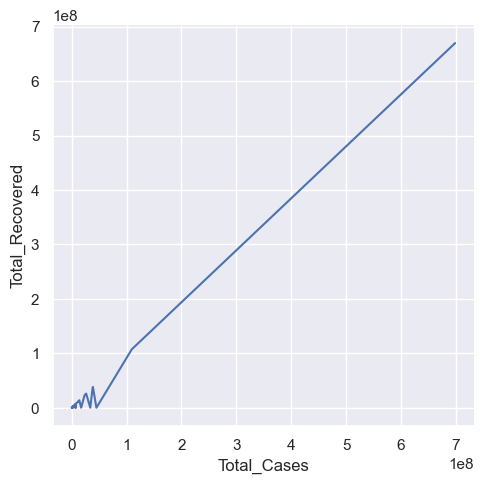

In [42]:
sns.relplot(x='Total_Cases', y = 'Total_Recovered', kind='line', data=df)

In [45]:
df['%Inc_cases'] = df['New_cases']/df['Total_Cases']*100
df['%Inc_deaths'] = df['new_deaths']/df['total_deaths']*100
df['%Inc_recovered'] = df['New_Recovered']/df['Total_Recovered']*100

In [46]:
df.head()

,Country,Total_Cases,New_cases,total_deaths,new_deaths,Total_Recovered,New_Recovered,Active_cases,Serious_critical,Tot_cases/1Mpop,Death/1Mpop,Total_tests,Tot_test/1Mpop,Population,Continent,%Inc_cases,%Inc_deaths,%Inc_recovered
0,World,698520112,22747.0,6944743,113.0,669848288,36726.0,21727081,35410,89614.0,890.9,-1,-1,-1,All,0.003256,0.001627,0.005483
1,USA,109566352,8960.0,1183692,28.0,107457904,29224.0,924756,1324,327254.0,3535.0,1186431916,3543648,334805269,North America,0.008178,0.002365,0.027196
2,India,45001944,137.0,533298,-1.0,0,0.0,0,0,31993.0,379.0,930797975,661721,1406631776,Asia,0.000304,-0.000188,NaN
3,Germany,38646996,5010.0,178236,74.0,38240600,-1.0,228160,0,460722.0,2125.0,122332384,1458359,83883596,Europe,0.012963,0.041518,-0.000003
4,Brazil,38048773,-1.0,707470,-1.0,36249161,-1.0,1092142,0,176680.0,3285.0,63776166,296146,215353593,South America,-0.000003,-0.000141,-0.000003


In [47]:
cases = df[['Total_Recovered','Active_cases','total_deaths']].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df

,index,0
0,Total_Recovered,669848288
1,Active_cases,21727081
2,total_deaths,6944743


In [48]:
cases_df.columns = ['Type', 'Total']
cases_df

,Type,Total
0,Total_Recovered,669848288
1,Active_cases,21727081
2,total_deaths,6944743


In [49]:
cases_df['Percentage'] = np.round(100*cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df

,Type,Total,Percentage
0,Total_Recovered,669848288,95.90
1,Active_cases,21727081,3.11
2,total_deaths,6944743,0.99


In [50]:
cases_df['Virus'] = ['Covid-19' for i in range(len(cases_df))]
cases_df

,Type,Total,Percentage,Virus
0,Total_Recovered,669848288,95.90,Covid-19
1,Active_cases,21727081,3.11,Covid-19
2,total_deaths,6944743,0.99,Covid-19


In [54]:
cases = df[['Total_Recovered','Active_cases','total_deaths']].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ['Type', 'Total']
cases_df['Percentage'] = np.round(100*cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Virus'] = ['Covid-19' for i in range(len(cases_df))]


fig = px.bar(cases_df, x='Virus', y='Percentage', color='Type', hover_data=['Total'])
fig.show()

In [55]:
cases = df[['New_cases','new_deaths','New_Recovered']].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ['Type', 'Total']
cases_df['Percentage'] = np.round(100*cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Virus'] = ['Covid-19' for i in range(len(cases_df))]


fig = px.bar(cases_df, x='Virus', y='Percentage', color='Type', hover_data=['Total'])
fig.show()

In [56]:
df.columns

Index(['Country', 'Total_Cases', 'New_cases', 'total_deaths', 'new_deaths',
       'Total_Recovered', 'New_Recovered', 'Active_cases', 'Serious_critical',
       'Tot_cases/1Mpop', 'Death/1Mpop', 'Total_tests', 'Tot_test/1Mpop',
       'Population', 'Continent', '%Inc_cases', '%Inc_deaths',
       '%Inc_recovered'],
      dtype='object')

In [58]:
per = np.round(df[['%Inc_cases','%Inc_deaths','%Inc_recovered']].loc[0],2)
per_df = pd.DataFrame(per)
per_df.columns = ['Percentage']

fig = go.Figure()
fig.add_trace(go.Bar(x=per_df.index, y=per_df['Percentage'],marker_color=['Yellow', 'red','Green']))
fig.show()


In [ ]:
# Continent wise
# Country wise

In [59]:
continent_df = df.groupby('Continent').sum().drop('All')
continent_df = continent_df.reset_index()
continent_df

,Continent,Total_Cases,New_cases,total_deaths,new_deaths,Total_Recovered,New_Recovered,Active_cases,Serious_critical,Tot_cases/1Mpop,Death/1Mpop,Total_tests,Tot_test/1Mpop,Population,%Inc_cases,%Inc_deaths,%Inc_recovered
0,Africa,12599404,-2.0,252238,-54.0,9390083,-19.0,393713,366,2488078.0,18364.0,107901626,10824034,1324052869,0.558021,85.011001,-49.730157
1,Asia,170084375,877.0,1487050,-44.0,57511469,194.0,1916844,335,6248760.0,32295.0,2182821780,83670167,3141088014,0.004915,-8.725754,-0.029004
2,Australia/Oceania,14615770,1632.0,30957,-19.0,14329286,-14.0,42574,30,4597443.0,9180.0,91667698,21266469,43410351,-1.511895,-98.638486,99.492739
3,Europe,189315709,11133.0,1724667,49.0,178400446,5800.0,801956,502,16227112.0,114201.0,2244140479,171652090,606962871,0.184001,-10.506386,0.175308
4,North America,129420039,8923.0,1655912,-9.0,124036016,30548.0,1504453,1452,8763732.0,58774.0,1325030168,99387509,598087045,-0.264095,-110.440526,-0.218933
5,South America,59222742,-12.0,1232344,-12.0,55876354,-10.0,1233683,641,1842931.0,30333.0,209670652,10814753,391680670,-0.004226,-0.431293,-0.010797


In [61]:
def continent_visuals(v_list):
    for label in v_list:
        c_df = continent_df[['Continent', label]]
        c_df['Percentage'] = np.round(100*c_df[label]/np.sum(c_df[label]),2)
        c_df['Virus'] = ['Covid-19' for i in range(len(c_df))]
        fig = px.bar(c_df, x ='Virus',y='Percentage', color='Continent',hover_data=[label])
        fig.update_layout(title={'text':f'{label}'})
        fig.show()
        gc.collect()

In [62]:
case_list = ['Total_Cases','Active_cases','Serious_critical','Tot_cases/1Mpop',
            '%Inc_cases']
death_list = ['total_deaths','new_deaths','Death/1Mpop','%Inc_deaths']

recovered_list = ['Total_Recovered','New_Recovered',
                 '%Inc_recovered']



In [63]:
continent_visuals(case_list)

In [64]:
continent_visuals(death_list)

In [65]:
continent_visuals(recovered_list)

In [68]:
df = df.drop([len(df)-1])
country_df = df.drop([0])
country_df

,Country,Total_Cases,New_cases,total_deaths,new_deaths,Total_Recovered,New_Recovered,Active_cases,Serious_critical,Tot_cases/1Mpop,Death/1Mpop,Total_tests,Tot_test/1Mpop,Population,Continent,%Inc_cases,%Inc_deaths,%Inc_recovered
1,USA,109566352,8960.0,1183692,28.0,107457904,29224.0,924756,1324,327254.0,3535.0,1186431916,3543648,334805269,North America,0.008178,0.002365,0.027196
2,India,45001944,137.0,533298,-1.0,0,0.0,0,0,31993.0,379.0,930797975,661721,1406631776,Asia,0.000304,-0.000188,NaN
3,Germany,38646996,5010.0,178236,74.0,38240600,-1.0,228160,0,460722.0,2125.0,122332384,1458359,83883596,Europe,0.012963,0.041518,-0.000003
4,Brazil,38048773,-1.0,707470,-1.0,36249161,-1.0,1092142,0,176680.0,3285.0,63776166,296146,215353593,South America,-0.000003,-0.000141,-0.000003
5,Japan,33803572,-1.0,74694,-1.0,0,0.0,0,0,269169.0,595.0,100414883,799578,125584838,Asia,-0.000003,-0.001339,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Tuvalu,2943,-1.0,1,-1.0,0,0.0,0,0,243909.0,83.0,-1,-1,12066,Australia/Oceania,-0.033979,-100.000000,NaN
205,Saint Helena,2166,-1.0,-1,-1.0,2,-1.0,2164,-1,354211.0,-1.0,-1,-1,6115,Africa,-0.046168,100.000000,-50.000000
206,Montserrat,1403,-1.0,8,-1.0,1376,-1.0,19,-1,282578.0,1611.0,17762,3577442,4965,North America,-0.071276,-12.500000,-0.072674
207,Niue,895,-1.0,-1,-1.0,889,-1.0,6,-1,551788.0,-1.0,-1,-1,1622,Australia/Oceania,-0.111732,100.000000,-0.112486


In [72]:
LOOK_AT = 5

country = country_df.columns[1:14]
fig = go.Figure()
c = 0

for i in country_df.index:
    if c < LOOK_AT:
        fig.add_trace(go.Bar(name=country_df['Country'][i], x=country, y= country_df.loc[i][1:14]))
    else:
        break
    c +=1
fig.update_layout(title={"text": f'top {LOOK_AT} countries affected'}, yaxis_type = 'log')
fig.show()